## Hotel reviews - Sentiment analysis

In [1]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np

import git
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import re

from keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from numpy.random import seed
seed(42)
repo = git.Repo('.', search_parent_directories=True)
data = train = pd.read_csv(os.path.join(repo.working_tree_dir, "MP2\\train.txt"), sep='\t', header = 0, names = ['sentiment','review'])

In [4]:
data.head()

,sentiment,review
0,TRUTHFULPOSITIVE,We stayed at the Omni between Christmas and Ne...
1,DECEPTIVENEGATIVE,I was REALLY looking forward to a nice relaxin...
2,TRUTHFULNEGATIVE,"First let me say, I try not to be too critical..."
3,DECEPTIVENEGATIVE,The Ambassador East Hotel is a terrible place ...
4,DECEPTIVENEGATIVE,I needed a place to stay for a business confer...


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data['review'].values, data['sentiment'].values, test_size=0.2, random_state=42, stratify=data['sentiment'].values)

y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

print(x_train.shape)
print(x_test.shape)

(1119,)
(280,)


### No preprocessing LSTM baseline

In [7]:
#Tokenizing text
max_vocab = 50000
tokenizer = Tokenizer(num_words = max_vocab)
tokenizer.fit_on_texts(x_train)

#Turning text into sequence
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

#Padding sequences
x_train_seq_pad = pad_sequences(x_train_seq)
x_test_seq_pad = pad_sequences(x_test_seq, maxlen = np.array(x_train_seq_pad).shape[1]) 

In [11]:
model = keras.Sequential(
    [
        Embedding(max_vocab + 1, 100, input_length = np.array(x_train_seq_pad).shape[1]),
        LSTM(128, dropout = 0.3, recurrent_dropout = 0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 784, 100)          5000100   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 5,134,376
Trainable params: 5,134,376
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train_seq_pad, y_train, batch_size = 64, epochs = 8, validation_split=0.1)

Epoch 1/8
16/16 [==============================] - 167s 10s/step - loss: 1.3854 - accuracy: 0.2473 - val_loss: 1.3823 - val_accuracy: 0.3036
Epoch 2/8
16/16 [==============================] - 153s 10s/step - loss: 1.3571 - accuracy: 0.4459 - val_loss: 1.2160 - val_accuracy: 0.5893
Epoch 3/8
16/16 [==============================] - 151s 9s/step - loss: 1.2301 - accuracy: 0.4906 - val_loss: 1.1143 - val_accuracy: 0.4643
Epoch 4/8
16/16 [==============================] - 153s 10s/step - loss: 0.9637 - accuracy: 0.5889 - val_loss: 0.9756 - val_accuracy: 0.4732
Epoch 5/8
16/16 [==============================] - 151s 9s/step - loss: 0.7039 - accuracy: 0.6941 - val_loss: 0.8588 - val_accuracy: 0.5089
Epoch 6/8
16/16 [==============================] - 152s 9s/step - loss: 0.4819 - accuracy: 0.7895 - val_loss: 1.2126 - val_accuracy: 0.5536
Epoch 7/8
16/16 [==============================] - 144s 9s/step - loss: 0.4117 - accuracy: 0.8620 - val_loss: 0.8185 - val_accuracy: 0.6250
Epoch 8/8
16/16 [

In [13]:
score = model.evaluate(x_test_seq_pad, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9828721284866333
Test accuracy: 0.5964285731315613


In [16]:
model2 = keras.Sequential(
    [
        Embedding(max_vocab + 1, 64, input_length = np.array(x_train_seq_pad).shape[1]),
        LSTM(128, dropout = 0.3, recurrent_dropout = 0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ]
)
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(x_train_seq_pad, y_train, batch_size = 32, epochs = 8, validation_split=0.1)
score = model2.evaluate(x_test_seq_pad, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/8
32/32 [==============================] - 138s 4s/step - loss: 1.3853 - accuracy: 0.2522 - val_loss: 1.3772 - val_accuracy: 0.3393
Epoch 2/8
32/32 [==============================] - 128s 4s/step - loss: 1.2501 - accuracy: 0.4350 - val_loss: 1.1729 - val_accuracy: 0.4911
Epoch 3/8
32/32 [==============================] - 121s 4s/step - loss: 0.9323 - accuracy: 0.5402 - val_loss: 0.9382 - val_accuracy: 0.4643
Epoch 4/8
32/32 [==============================] - 95s 3s/step - loss: 0.7038 - accuracy: 0.6495 - val_loss: 0.8697 - val_accuracy: 0.6161
Epoch 5/8
32/32 [==============================] - 59s 2s/step - loss: 0.7021 - accuracy: 0.7309 - val_loss: 0.8891 - val_accuracy: 0.5714
Epoch 6/8
32/32 [==============================] - 64s 2s/step - loss: 0.4849 - accuracy: 0.8213 - val_loss: 0.7403 - val_accuracy: 0.7232
Epoch 7/8
32/32 [==============================] - 65s 2s/step - loss: 0.2959 - accuracy: 0.8858 - val_loss: 0.8887 - val_accuracy: 0.7232
Epoch 8/8
32/32 [=======

In [15]:
model3 = keras.Sequential(
    [
        Embedding(max_vocab + 1, 128, input_length = np.array(x_train_seq_pad).shape[1]),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(64)),
        Dense(4, activation='softmax')
    ]
)
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model3.fit(x_train_seq_pad, y_train, batch_size = 32, epochs = 5, validation_split=0.1)
score = model3.evaluate(x_test_seq_pad, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/5
32/32 [==============================] - 96s 3s/step - loss: 1.3776 - accuracy: 0.2810 - val_loss: 1.3263 - val_accuracy: 0.4375
Epoch 2/5
32/32 [==============================] - 103s 3s/step - loss: 0.9359 - accuracy: 0.6425 - val_loss: 0.8595 - val_accuracy: 0.6875
Epoch 3/5
32/32 [==============================] - 91s 3s/step - loss: 0.4836 - accuracy: 0.8371 - val_loss: 0.9660 - val_accuracy: 0.6250
Epoch 4/5
32/32 [==============================] - 126s 4s/step - loss: 0.2634 - accuracy: 0.9186 - val_loss: 0.8376 - val_accuracy: 0.7411
Epoch 5/5
32/32 [==============================] - 101s 3s/step - loss: 0.1198 - accuracy: 0.9712 - val_loss: 1.0435 - val_accuracy: 0.6875
Test loss: 1.0958651304244995
Test accuracy: 0.6464285850524902


Due to the corpus having not sufficent (~1400) number of reviews, neural embedding was probably fitted poorly and then LSTM network performed fairly mediocore (~70%) due to overfitting tendency.

### EDA + preprocessing

In [35]:
#%pip install wordcloud
#%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

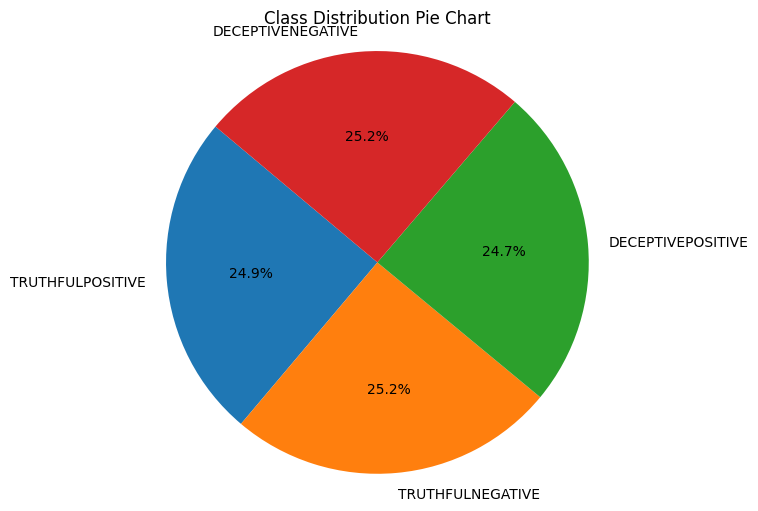

In [32]:
plt.figure(figsize=(6, 6))
labels = ['TRUTHFULPOSITIVE', 'TRUTHFULNEGATIVE', 'DECEPTIVEPOSITIVE', 'DECEPTIVENEGATIVE']
values = [len(data[data['sentiment'] == label]) for label in labels]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution Pie Chart')
plt.axis('equal')
plt.show()

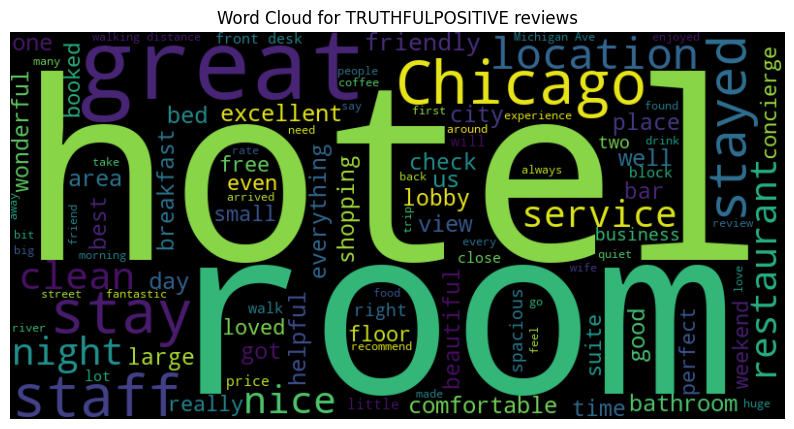

In [25]:
wcTP = WordCloud(max_words=1000, min_font_size=10, 
                height=400,width=800,background_color="black").generate(" ".join(data[data["sentiment"]=="TRUTHFULPOSITIVE"].review))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wcTP, interpolation='bilinear')
ax.set_axis_off()
ax.set_title('Word Cloud for TRUTHFULPOSITIVE reviews')
plt.show()

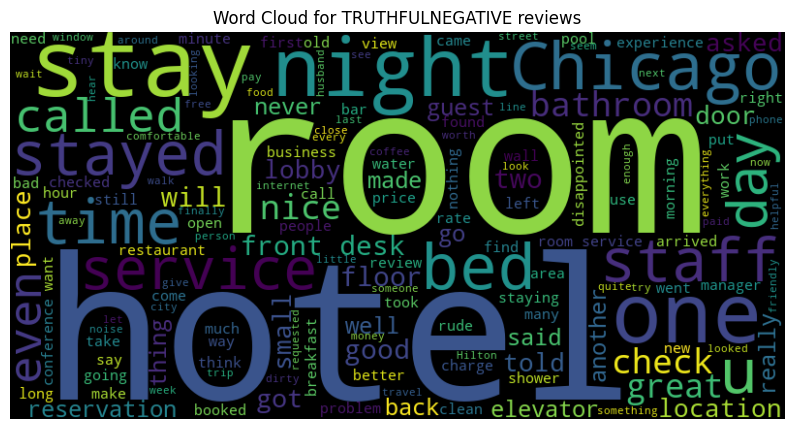

In [30]:
wcTN = WordCloud(max_words=1000, min_font_size=10, 
                height=400,width=800,background_color="black").generate(" ".join(data[data["sentiment"]=="TRUTHFULNEGATIVE"].review))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wcTN, interpolation='bilinear')
ax.set_axis_off()
ax.set_title('Word Cloud for TRUTHFULNEGATIVE reviews')
plt.show()

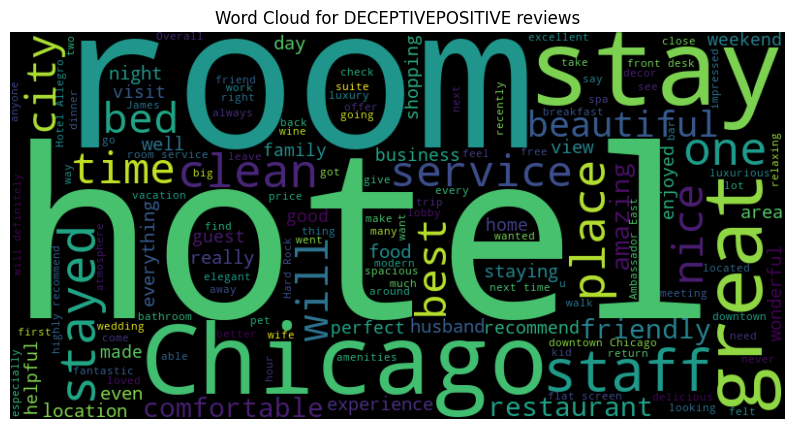

In [29]:
wcDP = WordCloud(max_words=1000, min_font_size=10, 
                height=400,width=800,background_color="black").generate(" ".join(data[data["sentiment"]=="DECEPTIVEPOSITIVE"].review))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wcDP, interpolation='bilinear')
ax.set_axis_off()
ax.set_title('Word Cloud for DECEPTIVEPOSITIVE reviews')
plt.show()

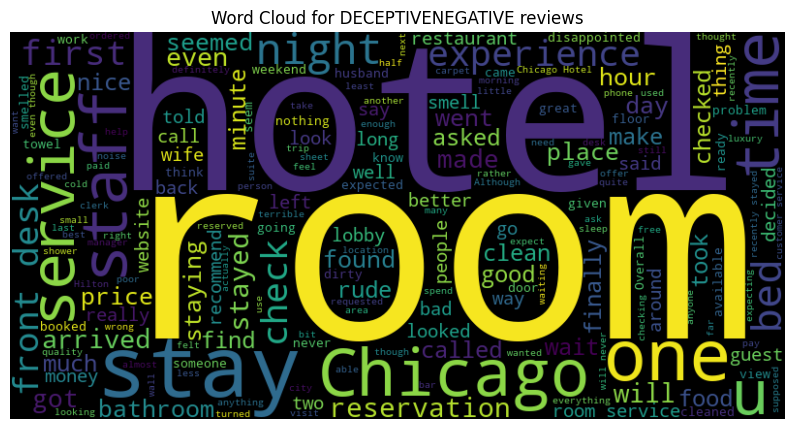

In [28]:
wcDN = WordCloud(max_words=1000, min_font_size=10, 
                height=400,width=800,background_color="black").generate(" ".join(data[data["sentiment"]=="DECEPTIVENEGATIVE"].review))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wcDN, interpolation='bilinear')
ax.set_axis_off()
ax.set_title('Word Cloud for DECEPTIVENEGATIVE reviews')
plt.show()

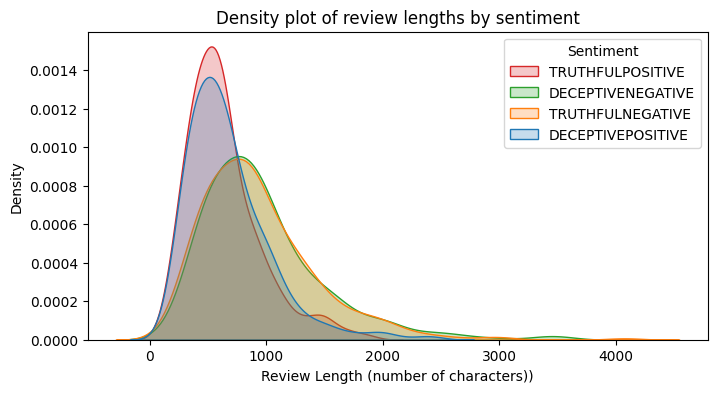

In [40]:
data['length'] = data['review'].apply(lambda x: len(x))

plt.figure(figsize=(8, 4))
sns.kdeplot(data=data, x='length', hue='sentiment', common_norm=False, fill=True)
plt.xlabel('Review Length (number of characters))')
plt.ylabel('Density')
plt.title('Density plot of review lengths by sentiment')
plt.legend(title='Sentiment', labels=data['sentiment'].unique())
plt.show()

In [3]:
#%pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piotr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
data['review'][0]


"We stayed at the Omni between Christmas and New Year's in 2008 just to get away for a few days. We found it through web deals and got a penthouse suite very cheap. So this year we checked online just a day or so after Christmas and the deal was there again. It also included parking at the great price. Huge suite overlooking downtown Chicago. Best location to walk EVERYWHERE. My 12 and 11 yr olds loved swimming at night and the chocolate cookies on their pillows. Can't wait to go back. "

In [4]:
#nltk.download('punkt')
#nltk.download('wordnet')

#removing puncuations, stopwords, tokenizing, lemmatizing and converting to lowercase if not all in caps
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

def clean(review):
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in set(stopwords.words('english'))])
    review = word_tokenize(review)
    review = [word.lower() if not word.isupper() else word for word in review]
    review = [WordNetLemmatizer().lemmatize(token) for token in review]
    return review

data['review'] = data['review'].apply(clean)

In [109]:
print(data['review'][0])

['we', 'stayed', 'omni', 'christmas', 'new', 'year', '2008', 'get', 'away', 'day', 'we', 'found', 'web', 'deal', 'got', 'penthouse', 'suite', 'cheap', 'so', 'year', 'checked', 'online', 'day', 'christmas', 'deal', 'it', 'also', 'included', 'parking', 'great', 'price', 'huge', 'suite', 'overlooking', 'downtown', 'chicago', 'best', 'location', 'walk', 'EVERYWHERE', 'my', '12', '11', 'yr', 'old', 'loved', 'swimming', 'night', 'chocolate', 'cooky', 'pillow', 'cant', 'wait', 'go', 'back']


In [5]:
#%pip install lightgbm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#train (80%) and test split (20%)
x_train, x_test, y_train, y_test = train_test_split(data['review'].values, data['sentiment'].values, test_size=0.2, random_state=42, stratify=data['sentiment'].values)

def id_tokenizer(text):
    return(text)

#vectorizing training corpus with tfidf
tfidf = TfidfVectorizer(tokenizer=id_tokenizer, lowercase=False)
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)


c:\Users\Piotr\miniconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [114]:
#now for 1119 reviews in the training set, we have 1119 vectors of length 8225
print(x_train_tf.shape)

(1119, 8225)


#### Logistic regression

In [6]:
from sklearn.model_selection import GridSearchCV


param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10],
    'solver': ['liblinear', 'saga']
}

lr = LogisticRegression()

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(x_train_tf, y_train)
lr = grid_search_lr.best_estimator_

print("Best hyperparameters: ", grid_search_lr.best_params_)
print("Best score: ", grid_search_lr.best_score_)
print("Test Accuracy  : {:.2f} %".format(accuracy_score(lr.predict(x_test_tf), y_test)*100))

Best hyperparameters:  {'C': 5, 'penalty': 'l2', 'solver': 'saga'}
Best score:  0.8159713324791801
Test Accuracy  : 83.93 %


c:\Users\Piotr\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### SVM

In [20]:
param_grid_svc = {
        'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
}

svc = SVC(probability=True)
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, n_jobs=-1)
grid_search_svc.fit(x_train_tf, y_train)

Best hyperparameters:  {'C': 5, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best score:  0.8249079115951314
Test Accuracy  : 83.21 %


In [23]:
svc = SVC(**grid_search_svc.best_params_, probability=True)
svc.fit(x_train_tf, y_train)

print("Best hyperparameters: ", grid_search_svc.best_params_)
print("Best score: ", grid_search_svc.best_score_)
print("Test Accuracy  : {:.2f} %".format(accuracy_score(svc.predict(x_test_tf), y_test)*100))

Best hyperparameters:  {'C': 5, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best score:  0.8249079115951314
Test Accuracy  : 83.21 %


#### Random Forest

In [138]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(x_train_tf, y_train)
rf = grid_search_rf.best_estimator_

print("Best hyperparameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)
print("Test Accuracy  : {:.2f} %".format(accuracy_score(rf.predict(x_test_tf), y_test)*100))


Best hyperparameters:  {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Best score:  0.7676929852658552
Test Accuracy  : 77.50 %


#### Naive Bayes

In [8]:
nb = MultinomialNB()

param_grid_nb = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'fit_prior': [True, False]
}

grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, n_jobs=-1)
grid_search_nb.fit(x_train_tf, y_train)

nb = MultinomialNB(**grid_search_nb.best_params_)
nb.fit(x_train_tf, y_train)

print("Best hyperparameters: ", grid_search_nb.best_params_)
print("Best score: ", grid_search_nb.best_score_)
print("Test Accuracy  : {:.2f} %".format(accuracy_score(nb.predict(x_test_tf), y_test)*100))

Best hyperparameters:  {'alpha': 0.5, 'fit_prior': True}
Best score:  0.8105781550288278
Test Accuracy  : 78.21 %


#### LightGBM

In [17]:
from lightgbm import LGBMClassifier

param_grid_lgbm = {
        'num_leaves': [32, 64, 128],
        'max_depth': [3, 4, 5],
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.05],
        'min_child_samples': [10, 20],
        'colsample_bytree': [0.5, 0.7],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [0, 0.1]
}

lgbm = LGBMClassifier(random_state=42)

grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, n_jobs=-1)
grid_search_lgbm.fit(x_train_tf, y_train)
lgbm = grid_search_lgbm.best_estimator_

print("Best hyperparameters: ", grid_search_lgbm.best_params_)
print("Best score: ", grid_search_lgbm.best_score_)
print("Test Accuracy  : {:.2f} %".format(accuracy_score(lgbm.predict(x_test_tf), y_test)*100))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21966
[LightGBM] [Info] Number of data points in the train set: 1119, number of used features: 1271
[LightGBM] [Info] Start training from score -1.381836
[LightGBM] [Info] Start training from score -1.396173
[LightGBM] [Info] Start training from score -1.378284
[LightGBM] [Info] Start training from score -1.388979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [ ]:
#### Linear classifier with SGD training

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

param_grid_en = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'loss': ['hinge', 'squared_error', 'huber', 'perceptron', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'modified_huber', 'log_loss', 'squared_hinge'],
        'penalty': ['l1', 'l2', 'elasticnet'],
}

en = SGDClassifier()

grid_search_en = GridSearchCV(en, param_grid_en, cv=5, n_jobs=-1)
grid_search_en.fit(x_train_tf, y_train)
en = grid_search_en.best_estimator_

print("Best hyperparameters: ", grid_search_en.best_params_)
print("Best score: ", grid_search_en.best_score_)
print("Test Accuracy  : {:.2f} %".format(accuracy_score(en.predict(x_test_tf), y_test)*100))

Best hyperparameters:  {'alpha': 0.0001, 'l1_ratio': 0.9, 'loss': 'log_loss', 'penalty': 'l2'}
Best score:  0.8168521780909671
Test Accuracy  : 82.50 %


In [32]:
from sklearn.ensemble import StackingClassifier

# create the base estimators
estimators = [('nb', nb), ('svc', svc), ('lr', lr)]

# create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_clf.fit(x_train_tf, y_train)
print("Test Accuracy  : {:.2f} %".format(accuracy_score(stacking_clf.predict(x_test_tf), y_test)*100))

c:\Users\Piotr\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Piotr\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Piotr\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Accuracy  : 85.00 %


c:\Users\Piotr\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
